# Assignment 1 - Rhythm Generator
### Mariella Daghfal, Kaede Johnson, Shayan Khajehnouri, & Tahel Singer

In [1]:
# to be safe i personally created venv with anaconda terminal.
# conda create -n "digital_musicology" python=3.8
# conda activate digital_musicology
# conda install pip

In [2]:
## Dependencies
# pip install music21
# pip install tqdm
# pip install pandas
from music21 import *
from tqdm import *
import pandas as pd
import numpy as np
import collections

## for viewing score, download and install finale note pad at https://store.makemusic.com/Downloads/Default.aspx?id=538&_ga=2.3616692.58482559.1678537005-1850486829.1678537005 and then run:
# configure.run()

## I don't know if it's because I screwed up something during initial setup but this is what I had to do to get music showing:
# environment.set('musescoreDirectPNGPath', 'C:\\Program Files (x86)\\Finale NotePad 2012\\Finale NotePad.exe')

In [3]:
## Bach score from package

s = corpus.parse('bach/bwv65.2.xml')

# Print music12 object to show it worked
# s.show('text')

# image version (ideally this is inline but i can't get that working; for me it pulls open finale note pad with the sheet music in a separate window)
# s.show()

In [4]:
## Load scores into corpus
# Be sure to modify folder path below
# Excludes scores that aren't strictly 3/4 meter all the way through (only 15 / 600)

import os
import tqdm
slangpolska_scores = {}
excluded = 0
# CHANGE FOLDER BELOW TO LOCATION OF XML FILES. Download xml folders from https://github.com/DCMLab/music-generation-challenge-2021/tree/main/data
xml_file_location = 'C:/Users/HP/anaconda3/envs/digital_musicology/xml/'
scores_xml = os.listdir(xml_file_location)
for si in trange(len(scores_xml)):
    if scores_xml[si] != 'conversion.log':
        tmp = converter.parse(xml_file_location + scores_xml[si])
        tmp_meters = tmp.recurse().getElementsByClass(meter.TimeSignature)
        if len(tmp_meters) != 1 or tmp_meters[0].ratioString != '3/4':
            print('excluding ' + scores_xml[si] + '. ' + str(len(tmp_meters)) + ' meter(s), first is ' + tmp_meters[0].ratioString)
            excluded += 1
        else:
            slangpolska_scores[scores_xml[si]] = tmp

print('Imported ' + str(len(slangpolska_scores)) + ' scores into corpus. Excluded ' + str(excluded) + ' due to inconsistent meter.')


  5%|▍         | 28/600 [00:02<01:30,  6.34it/s]

excluding Ninas_slängpolska_20240b.xml. 2 meter(s), first is 3/4


 22%|██▎       | 135/600 [00:16<00:38, 11.95it/s]

excluding Poloness_ur_Andreas_Hööks_notbok_cae293.xml. 4 meter(s), first is 2/2


 23%|██▎       | 137/600 [00:17<00:38, 11.90it/s]

excluding Polonoise_92b598.xml. 2 meter(s), first is 3/4


 47%|████▋     | 280/600 [00:34<00:35,  8.94it/s]

excluding Polonäs_i_Dm_efter_Daniel_Danielsson_ac3754.xml. 2 meter(s), first is 3/4


 52%|█████▏    | 314/600 [00:37<00:28, 10.18it/s]

excluding Polonäs_sexdregasamlingen_del_3_nr_1_d8c3dc.xml. 2 meter(s), first is 3/4


 63%|██████▎   | 379/600 [00:45<00:26,  8.46it/s]

excluding Polska_efter_Wesslén_bec4ac.xml. 2 meter(s), first is 3/4
excluding Polska_efter_Wesslén_ce0449.xml. 2 meter(s), first is 3/4


 64%|██████▎   | 382/600 [00:46<00:28,  7.74it/s]

excluding Polska_efter_Wesslén_fc5278.xml. 2 meter(s), first is 3/4


 65%|██████▌   | 391/600 [00:47<00:21,  9.79it/s]

excluding Polska_från_Västergötland_4b64d8.xml. 3 meter(s), first is 3/4


 70%|███████   | 422/600 [00:50<00:15, 11.16it/s]

excluding Sydjämtsk_slängpolska_efter_JohnErik_Mattsson_2a0874.xml. 2 meter(s), first is 3/4


 79%|███████▉  | 473/600 [00:56<00:12, 10.34it/s]

excluding _Polonäs_sexdregasamlingen_del_1_nr_36_dfc2c9.xml. 2 meter(s), first is 3/4
excluding _Polonäs_sexdregasamlingen_del_1_nr_36_ed2b21.xml. 2 meter(s), first is 3/4


 93%|█████████▎| 560/600 [01:06<00:05,  7.64it/s]

excluding _Polska_efter_Gustav_Strutz_21bb05.xml. 5 meter(s), first is 3/4
excluding _Polska_efter_Gustav_Strutz_5b7324.xml. 5 meter(s), first is 3/4


 98%|█████████▊| 587/600 [01:09<00:01, 10.01it/s]

excluding _Polska_Kringellåt_efter_Snickar_Erik_985b63.xml. 3 meter(s), first is 4/4


100%|██████████| 600/600 [01:10<00:00,  8.51it/s]

Imported 584 scores into corpus. Excluded 15 due to inconsistent meter.


In [5]:
# Investigate one score to get familiar with music21
sample_score = slangpolska_scores['_1814_698087.xml']
print('music21 object for imported score is called ' + str(type(sample_score)))
#print('sample score key is ' + str(sample_score.analyze('key')))
print('The first time signature object is ' + sample_score.recurse().getElementsByClass(meter.TimeSignature)[0].ratioString)
print('There is (are) ' + str(len(sample_score.recurse().getElementsByClass(meter.TimeSignature))) + ' time signature object(s)')
print('Measure 6 does not have a time signature object: ' + str(sample_score.measure(6).timeSignature is None))
print('Recall the sample score is in time ' + sample_score.recurse().getElementsByClass(meter.TimeSignature)[0].ratioString)
curr_measure = 0
for i in sample_score.recurse().notes:
    if i.measureNumber != curr_measure:
        curr_measure = i.measureNumber
        print("Measure " + str(curr_measure))
    print('Beat: ' + str(i.beat) + ', Duration: ' + str(i.duration.quarterLength) + ', Pitch: ' + str(i.name) + ', Accents: ' + str(i.articulations))
print('Music21 object print:')
sample_score.show('text')

music21 object for imported score is called <class 'music21.stream.base.Score'>
The first time signature object is 3/4
There is (are) 1 time signature object(s)
Measure 6 does not have a time signature object: True
Recall the sample score is in time 3/4
Measure 1
Beat: 1.0, Duration: 0.5, Pitch: D, Accents: []
Beat: 1.5, Duration: 0.5, Pitch: C, Accents: []
Beat: 2.0, Duration: 1.0, Pitch: B, Accents: []
Beat: 3.0, Duration: 1.0, Pitch: G, Accents: []
Measure 2
Beat: 1.0, Duration: 0.5, Pitch: C, Accents: []
Beat: 1.5, Duration: 0.5, Pitch: B, Accents: []
Beat: 2.0, Duration: 1.0, Pitch: A, Accents: []
Beat: 3.0, Duration: 1.0, Pitch: D, Accents: []
Measure 3
Beat: 1.0, Duration: 0.75, Pitch: G, Accents: []
Beat: 1.75, Duration: 0.25, Pitch: F#, Accents: []
Beat: 2.0, Duration: 0.5, Pitch: G, Accents: []
Beat: 2.5, Duration: 0.5, Pitch: A, Accents: []
Beat: 3.0, Duration: 0.5, Pitch: B, Accents: []
Beat: 3.5, Duration: 0.5, Pitch: C, Accents: []
Measure 4
Beat: 1.0, Duration: 0.5, Pitc

In [38]:
from collections import Counter
total_note_count = 0
total_accents = 0
total_scores_w_accents = 0
articulations = []
for i, score in enumerate(slangpolska_scores):
    fresh_score = 1
    for note in slangpolska_scores[score].recurse().notesAndRests:
        total_note_count += 1
        if len(note.articulations) > 0:
            total_accents += len(note.articulations)
            articulations.append(note.articulations)
            if fresh_score == 1:
                total_scores_w_accents += 1
                fresh_score = 0
flat_articulations = [artic.name for sublist in articulations for artic in sublist]
accent_shares = collections.Counter(flat_articulations).most_common(10)
for i in range(len(accent_shares)):
    accent_shares[i] = (accent_shares[i][0], accent_shares[i][1] / total_note_count)
print("Shares of scores with accents")
print(total_scores_w_accents / len(slangpolska_scores.keys()))
print("Share of notes with certain accent type")
print(accent_shares)


Shares of scores with accents
0.08561643835616438
Share of notes with certain accent type
[('staccato', 0.009076193779627702), ('tenuto', 0.00047693374956642387), ('down bow', 0.00046248121170077463), ('staccatissimo', 0.0003613134466412302), ('accent', 0.00023124060585038732), ('up bow', 0.00023124060585038732), ('open string', 0.00010116776505954446), ('stopped', 7.226268932824603e-05)]


In [39]:
# Tokenization
# Starting simple until we define rhythm. Tokens will simply be location of beat in measure (that is, first element in Beat: , Duration: , Pitch: printout sequence above)
# First, observe where beats can occur (also sneakily multiply beat timings by 12 because see output + explanation in next cell)
import collections
all_beats = []
for score in slangpolska_scores:
    if (slangpolska_scores[score].recurse().notes[-1].measureNumber >= 4): # and (slangpolska_scores[score].recurse().notes[0].beat == 1):
        for note in slangpolska_scores[score].recurse().notesAndRests:
            all_beats.append(float(note.beat) + (3 * (note.measureNumber-1)))
note_placements = collections.Counter(all_beats).most_common(100)
location = []
frequency = []
for i,tuple in enumerate(note_placements):
    try:
        if np.isnan(float((tuple[0]))) == False:
            location.append(float((tuple[0])))
            frequency.append(tuple[1])
    except:
        print(tuple[0])

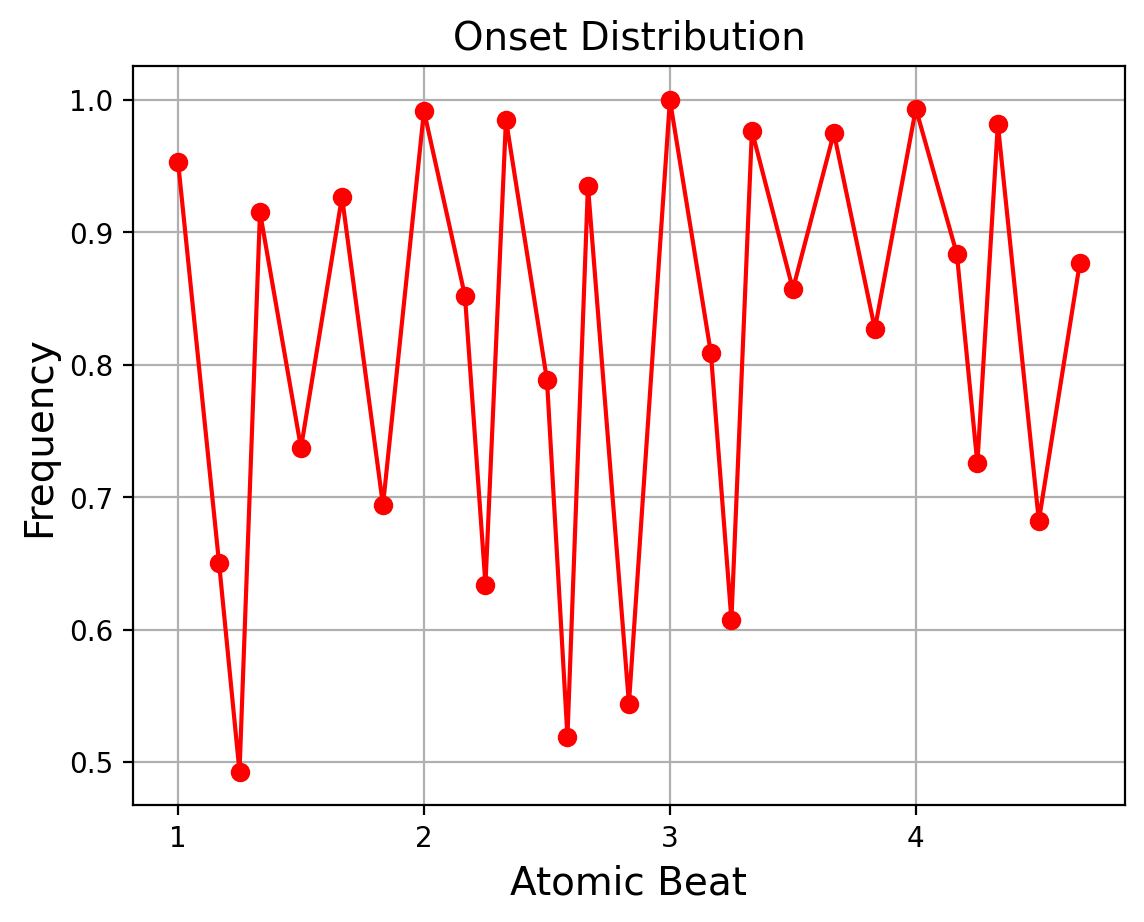

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
max_frequency = max(frequency)
onset_distribution = pd.DataFrame(list(zip(location, frequency)),
               columns =['atomic_moment', 'frequency'])
onset_distribution['frequency'] = onset_distribution['frequency'] / max_frequency
onset_distribution = onset_distribution.sort_values(by='atomic_moment')
onset_distribution = onset_distribution[onset_distribution['atomic_moment'] <= 12]
plt.plot(onset_distribution['atomic_moment'], onset_distribution['frequency'], color='red', marker='o')
plt.title('Onset Distribution', fontsize=14)
plt.xlabel('Atomic Beat', fontsize=14)
plt.xticks([1, 4, 7, 10], ['1','2','3','4'])
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

[ 1.    1.25  1.5   1.75  2.    2.5   3.    3.25  3.5   3.75  4.    4.25
  4.5   4.75  5.    5.25  5.5   5.75  6.    6.25  6.5   6.75  7.    7.25
  7.5   7.75  8.    8.5   9.    9.25  9.5   9.75 10.   10.25 10.5  10.75
 11.   11.5  12.   16.   16.5  16.75 17.   17.25 17.5  17.75 18.   18.25
 18.5  18.75 19.   19.25 19.5  19.75 20.   20.25 20.5  20.75 21.   21.25
 21.5  21.75 22.   22.5  22.75 23.   23.25 23.5  23.75 24.   24.25 24.5
 24.75 25.   25.25 25.5  25.75 26.   26.25 26.5  26.75 27.   27.25 27.5
 27.75 28.   28.75 29.   29.5  30.   30.25 30.5  30.75 31.   31.25 31.5
 31.75 32.   32.5  33.   33.5  34.   34.75 35.   35.5  36.   36.25 36.5
 36.75 37.   37.25 37.5  37.75 38.   38.5  39.   39.5  40.   40.5  40.75
 41.   41.25 41.5  41.75 42.   42.25 42.5  42.75 43.   43.25 43.5  43.75
 44.   44.25 44.5  44.75 45.   45.25 45.5  45.75 46.   46.5  46.75 47.
 47.25 47.5  47.75 48.   48.25 48.5  48.75 49.   49.25 49.5  49.75 50.
 50.25 50.5  50.75 51.   51.25 51.5  51.75 52.   52.75 53. 

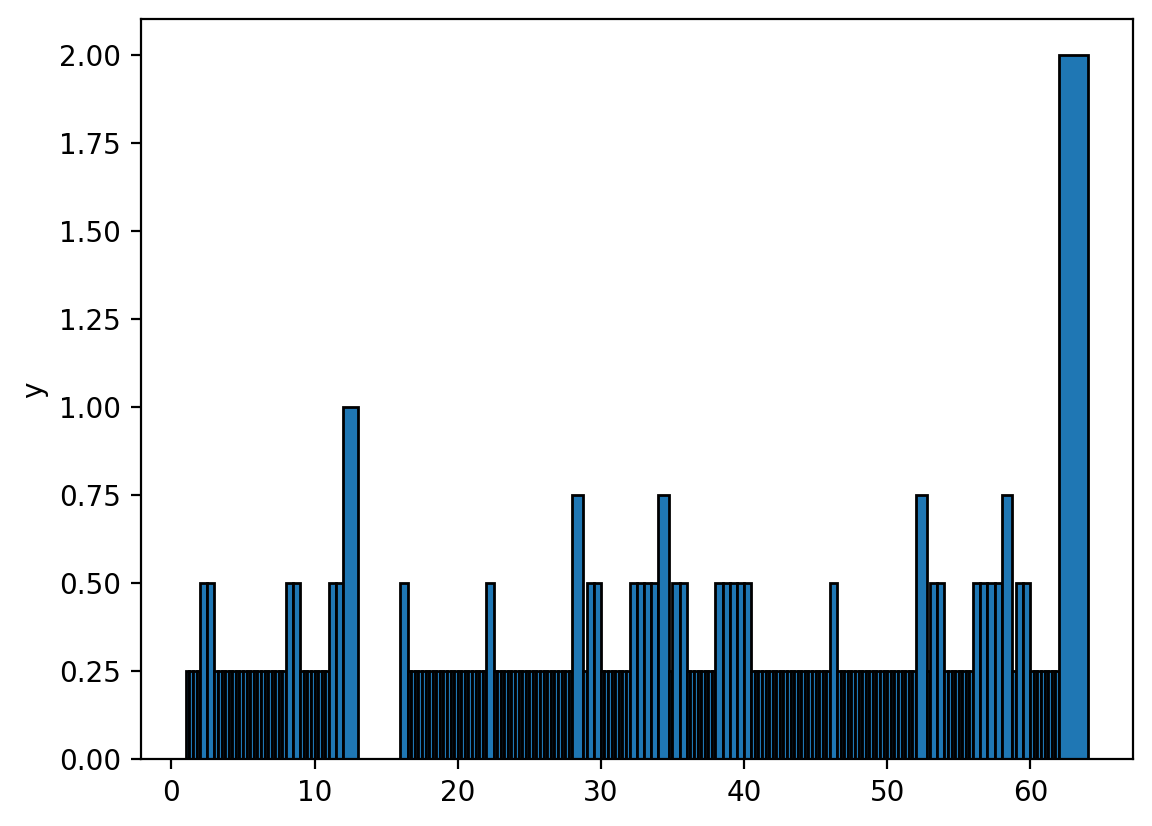

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm

onsets = []
heights = []
for note in slangpolska_scores['_Fingertarmen_polska_efter_ByssKalle_nr_46_b824bf.xml'].recurse().notes:
    #print(note, note.beat + (3 * (note.measureNumber-1)), note.duration.quarterLength)
    onsets.append(note.beat + (3 * (note.measureNumber-1)))
    heights.append(note.duration.quarterLength)
x = np.asarray(onsets)
y = np.asarray(heights)
#onsets.append(onsets[-1] + heights[-1])

print(x, y, bin_width)
fig, ax = plt.subplots()
bar_plot = ax.bar(x, y, width=y, align='edge', edgecolor='black') # width=bin_width
ax.set_ylabel("y")

plt.show()

In [42]:
# Beat b can occur along the interval 1 <= b < 4. Note some beats occur on a fraction with maximum denominator 12.
# Therefore, to deal with one data type (floats) our tokens are beat timings multiplied by twelve. We can theoretically divide our generated beat timings by 12 to map back to reality.
# That said, this script is just working toward a proof of concept right now, and I suspect our tokenziation will change. Also I bet floats are awful for NLP models so if we end up doing
# an RNN or working with tensors we'll probably do what xml does - integers based on note size. I just wanted to move forward on a workflow.
# TODO: Linearize repeat bars
# TODO: Decide what rhythm is and create smarter tokens
# TODO: Remove or handle the 1-2 score(s) with nan beat timings
from itertools import chain





AttributeError: 'list' object has no attribute 'values'

In [110]:
# TODO: Random rhythm gen, smart rhythm gen, discover rhythm visualizer and comparison metric...

foo
